In [1]:
!pip install pandas


In [ ]:
import pandas as pd

data = "/content/sales_details.csv"

In [6]:
df = pd.read_csv(data)

In [8]:
df.head()


,sls_ord_num,sls_prd_key,sls_cust_id,sls_order_dt,sls_ship_dt,sls_due_dt,sls_sales,sls_quantity,sls_price
0,SO43697,BK-R93R-62,21768,20101229,20110105,20110110,3578.0,1,3578.0
1,SO43698,BK-M82S-44,28389,20101229,20110105,20110110,3400.0,1,3400.0
2,SO43699,BK-M82S-44,25863,20101229,20110105,20110110,3400.0,1,3400.0
3,SO43700,BK-R50B-62,14501,20101229,20110105,20110110,699.0,1,699.0
4,SO43701,BK-M82S-44,11003,20101229,20110105,20110110,3400.0,1,3400.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sls_ord_num   60398 non-null  object 
 1   sls_prd_key   60398 non-null  object 
 2   sls_cust_id   60398 non-null  int64  
 3   sls_order_dt  60398 non-null  int64  
 4   sls_ship_dt   60398 non-null  int64  
 5   sls_due_dt    60398 non-null  int64  
 6   sls_sales     60390 non-null  float64
 7   sls_quantity  60398 non-null  int64  
 8   sls_price     60391 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 4.1+ MB


In [72]:
df['sls_ord_num'].duplicated()

,sls_ord_num
0,False
1,False
2,False
3,False
4,False
...,...
60393,False
60394,True
60395,False
60396,True


In [75]:
df[df['sls_ord_num'].duplicated()]

,sls_ord_num,sls_prd_key,sls_cust_id,sls_order_dt,sls_ship_dt,sls_due_dt,sls_sales,sls_quantity,sls_price
5429,SO51176,BC-R205,18239,20121228,20130104,20130109,9.0,1,9.0
5431,SO51177,HL-U509,27873,20121228,20130104,20130109,35.0,1,35.0
5433,SO51178,BC-M005,11245,20121228,20130104,20130109,10.0,1,10.0
5434,SO51178,WB-H098,11245,20121228,20130104,20130109,5.0,1,5.0
5436,SO51179,TI-R982,22430,20121228,20130104,20130109,33.0,1,33.0
...,...,...,...,...,...,...,...,...,...
60391,SO75121,TI-M823,15251,20140128,20140204,20140209,35.0,1,35.0
60392,SO75121,HL-U509-R,15251,20140128,20140204,20140209,35.0,1,35.0
60394,SO75122,CA-1098,15868,20140128,20140204,20140209,9.0,1,9.0
60396,SO75123,ST-1401,18759,20140128,20140204,20140209,159.0,1,159.0


order numbers are duplicated for each product sale canot keep it as primary

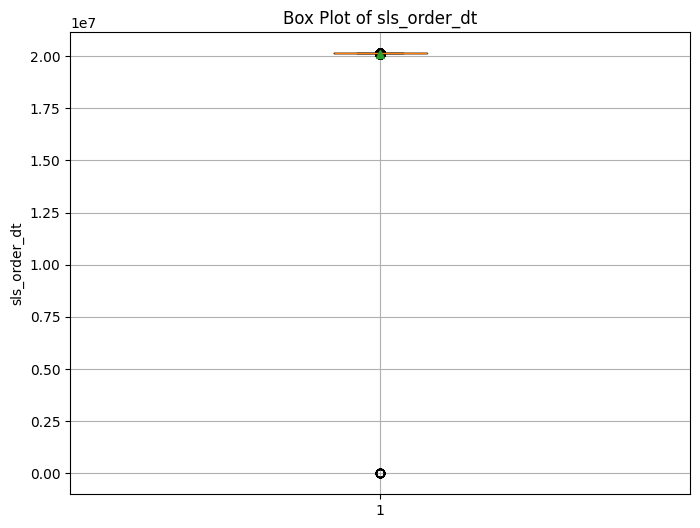

Mode of sls_order_dt: 20131212
Median of sls_order_dt: 20130714.0


In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['sls_order_dt'], showmeans=True)

# Customize the plot
plt.title('Box Plot of sls_order_dt')
plt.ylabel('sls_order_dt')
plt.grid(True)

# Display the plot
plt.show()

# Calculate the mode (most recurring value)
mode_val = df['sls_order_dt'].mode()[0]
print(f"Mode of sls_order_dt: {mode_val}")

# Calculate the median (middle value)
median_val = df['sls_order_dt'].median()
print(f"Median of sls_order_dt: {median_val}")

In [90]:
df['sls_order_dt'] = pd.to_datetime(df['sls_order_dt'])

In [82]:
df[df['sls_order_dt'] == 0]

,sls_ord_num,sls_prd_key,sls_cust_id,sls_order_dt,sls_ship_dt,sls_due_dt,sls_sales,sls_quantity,sls_price


In [81]:
df['sls_order_dt'] = df['sls_order_dt'].replace(0, 20131212)

adding mode value of date where date is 0

In [86]:
df['sls_order_dt'] = df['sls_order_dt'].replace(32154, 20131212)

In [96]:
df

,sls_ord_num,sls_prd_key,sls_cust_id,sls_order_dt,sls_ship_dt,sls_due_dt,sls_sales,sls_quantity,sls_price
0,SO43697,BK-R93R-62,21768,1970-01-01 00:00:00.020101229,20110105,20110110,3578.0,1,3578.0
1,SO43698,BK-M82S-44,28389,1970-01-01 00:00:00.020101229,20110105,20110110,3400.0,1,3400.0
2,SO43699,BK-M82S-44,25863,1970-01-01 00:00:00.020101229,20110105,20110110,3400.0,1,3400.0
3,SO43700,BK-R50B-62,14501,1970-01-01 00:00:00.020101229,20110105,20110110,699.0,1,699.0
4,SO43701,BK-M82S-44,11003,1970-01-01 00:00:00.020101229,20110105,20110110,3400.0,1,3400.0
...,...,...,...,...,...,...,...,...,...
60393,SO75122,FE-6654,15868,1970-01-01 00:00:00.020140128,20140204,20140209,22.0,1,22.0
60394,SO75122,CA-1098,15868,1970-01-01 00:00:00.020140128,20140204,20140209,9.0,1,9.0
60395,SO75123,FE-6654,18759,1970-01-01 00:00:00.020140128,20140204,20140209,22.0,1,22.0
60396,SO75123,ST-1401,18759,1970-01-01 00:00:00.020140128,20140204,20140209,159.0,1,159.0


In [97]:
df.to_csv('sales_deatails4.csv', index=False)

**CUST_INFO DATA EXPLORATION**

In [36]:
df2=pd.read_csv("/content/cust_info.csv")
df2

,cst_id,cst_key,cst_firstname,cst_lastname,cst_marital_status,cst_gndr,cst_create_date
0,11000.0,AW00011000,Jon,Yang,M,M,2025-10-06
1,11001.0,AW00011001,Eugene,Huang,S,M,2025-10-06
2,11002.0,AW00011002,Ruben,Torres,M,M,2025-10-06
3,11003.0,AW00011003,Christy,Zhu,S,F,2025-10-06
4,11004.0,AW00011004,Elizabeth,Johnson,S,F,2025-10-06
...,...,...,...,...,...,...,...
18489,29482.0,AW00029482,Clayton,Zhang,M,NaN,2026-01-25
18490,29483.0,AW00029483,NaN,Navarro,NaN,NaN,2026-01-25
18491,29483.0,AW00029483,Marc,Navarro,M,NaN,2026-01-27
18492,NaN,13451235,NaN,NaN,NaN,NaN,NaN


In [37]:
df2.isnull().sum()

,0
cst_id,4
cst_key,0
cst_firstname,8
cst_lastname,7
cst_marital_status,7
cst_gndr,4578
cst_create_date,4


In [46]:
df2

,cst_id,cst_key,cst_firstname,cst_lastname,cst_marital_status,cst_gndr,cst_create_date
0,11000.0,AW00011000,Jon,Yang,M,M,2025-10-06
1,11001.0,AW00011001,Eugene,Huang,S,M,2025-10-06
2,11002.0,AW00011002,Ruben,Torres,M,M,2025-10-06
3,11003.0,AW00011003,Christy,Zhu,S,F,2025-10-06
4,11004.0,AW00011004,Elizabeth,Johnson,S,F,2025-10-06
...,...,...,...,...,...,...,...
18486,29479.0,AW00029479,Tommy,Tang,M,NaN,2026-01-25
18487,29480.0,AW00029480,Nina,Raji,S,NaN,2026-01-25
18488,29481.0,AW00029481,Ivan,Suri,S,NaN,2026-01-25
18489,29482.0,AW00029482,Clayton,Zhang,M,NaN,2026-01-25


In [42]:
df2['cst_id'].duplicated().sum()

9

In [43]:
df2 = df2.drop_duplicates(subset=['cst_id'])

In [44]:
df2

,cst_id,cst_key,cst_firstname,cst_lastname,cst_marital_status,cst_gndr,cst_create_date
0,11000.0,AW00011000,Jon,Yang,M,M,2025-10-06
1,11001.0,AW00011001,Eugene,Huang,S,M,2025-10-06
2,11002.0,AW00011002,Ruben,Torres,M,M,2025-10-06
3,11003.0,AW00011003,Christy,Zhu,S,F,2025-10-06
4,11004.0,AW00011004,Elizabeth,Johnson,S,F,2025-10-06
...,...,...,...,...,...,...,...
18486,29479.0,AW00029479,Tommy,Tang,M,NaN,2026-01-25
18487,29480.0,AW00029480,Nina,Raji,S,NaN,2026-01-25
18488,29481.0,AW00029481,Ivan,Suri,S,NaN,2026-01-25
18489,29482.0,AW00029482,Clayton,Zhang,M,NaN,2026-01-25


In [45]:


df2.to_csv('cust_info4.csv', index=False)
